# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
android = pd.read_csv('../data/android_persistence_cpu.csv', delimiter=';')
android.info()
# Persistence_type = CategoricalDtype(categories=['Sharedpreferences', 'GreenDao', 'SQLLite', 'Realm'], ordered=False)
# android['PersistenceType'] = android['PersistenceType'].astype(Persistence_type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             300 non-null    float64
 1   PersistenceType  300 non-null    object 
 2   DataSize         300 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

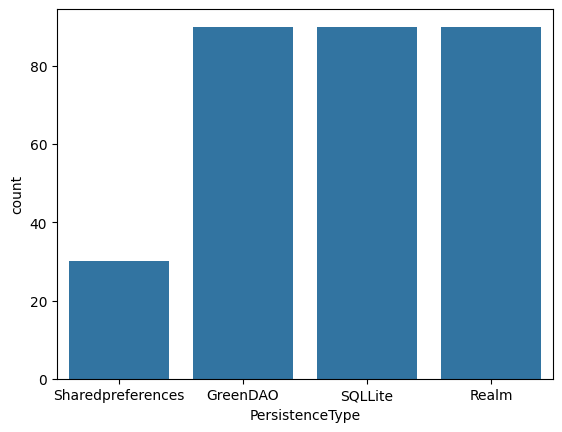

In [18]:
sns.countplot(data=android, x='PersistenceType');

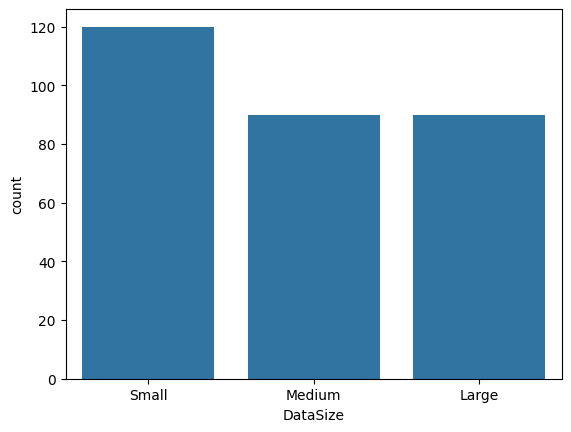

In [19]:
sns.countplot(data=android, x='DataSize');

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

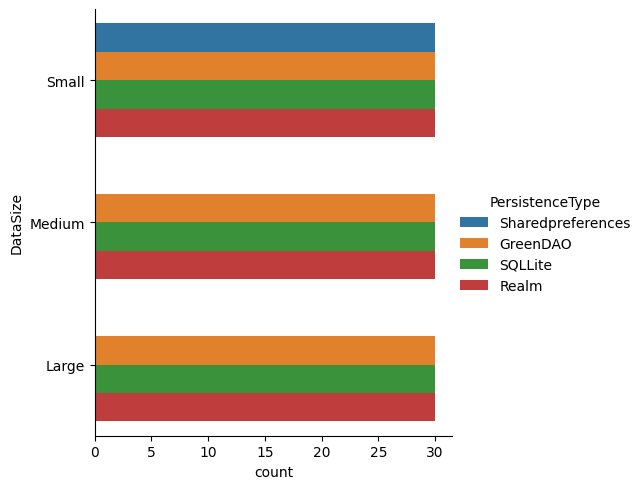

In [20]:
sns.catplot(data = android, kind = "count", y = "DataSize", hue='PersistenceType');

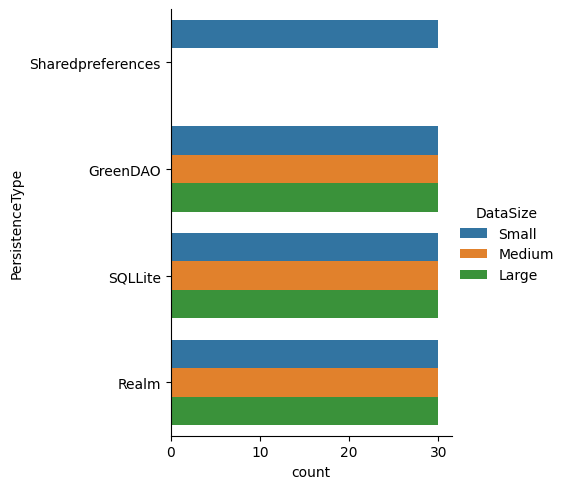

In [21]:
sns.catplot(data = android, kind = "count", y = "PersistenceType", hue='DataSize');

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time', ylabel='DataSize'>

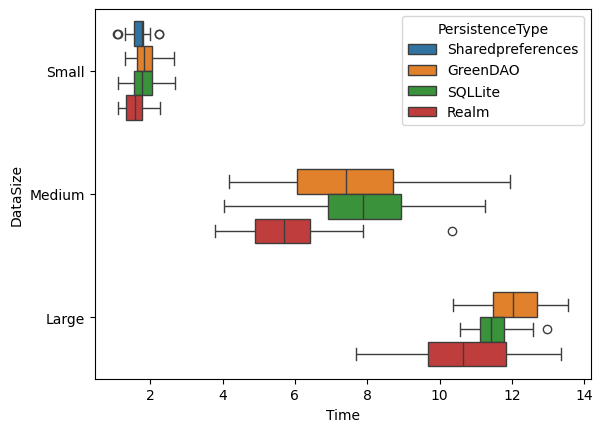

In [27]:
sns.boxplot(data=android, x='Time', y='DataSize', hue='PersistenceType')

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

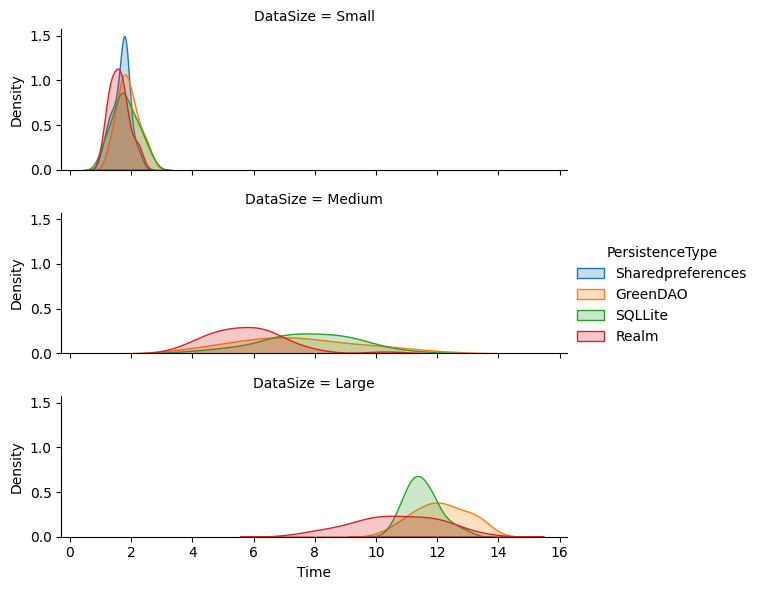

In [34]:
g = sns.FacetGrid(android, row="DataSize", hue="PersistenceType", aspect=3, height=2, sharex=True)
g.map(sns.kdeplot, "Time", fill=True).add_legend()

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [37]:
print(f"Mean: {android['Time'].mean():.3f}")
print(f"STD: {android['Time'].std():.3f}")

print(f"Mean  {android.groupby(['DataSize'])['Time'].mean()}")
print(f"STD  {android.groupby(['DataSize'])['Time'].std()}")

print(f"Mean  {android.groupby(['PersistenceType'])['Time'].mean()}")
print(f"STD  {android.groupby(['PersistenceType'])['Time'].std()}")

print(f"Mean  {android.groupby(['DataSize', 'PersistenceType'])['Time'].mean()}")
print(f"STD  {android.groupby(['DataSize', 'PersistenceType'])['Time'].std()}")

Mean: 6.231
STD: 4.230
Mean  DataSize
Large     11.425667
Medium     7.022000
Small      1.741333
Name: Time, dtype: float64
STD  DataSize
Large     1.163785
Medium    1.864335
Small     0.358625
Name: Time, dtype: float64
Mean  PersistenceType
GreenDAO             7.152667
Realm                6.022889
SQLLite              7.036000
Sharedpreferences    1.673667
Name: Time, dtype: float64
STD  PersistenceType
GreenDAO             4.385917
Realm                3.884175
SQLLite              4.146336
Sharedpreferences    0.285192
Name: Time, dtype: float64
Mean  DataSize  PersistenceType  
Large     GreenDAO             12.110333
          Realm                10.651667
          SQLLite              11.515000
Medium    GreenDAO              7.454000
          Realm                 5.818000
          SQLLite               7.794000
Small     GreenDAO              1.893667
          Realm                 1.599000
          SQLLite               1.799000
          Sharedpreferences     1.673

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
